- This is applied when we have skewed data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

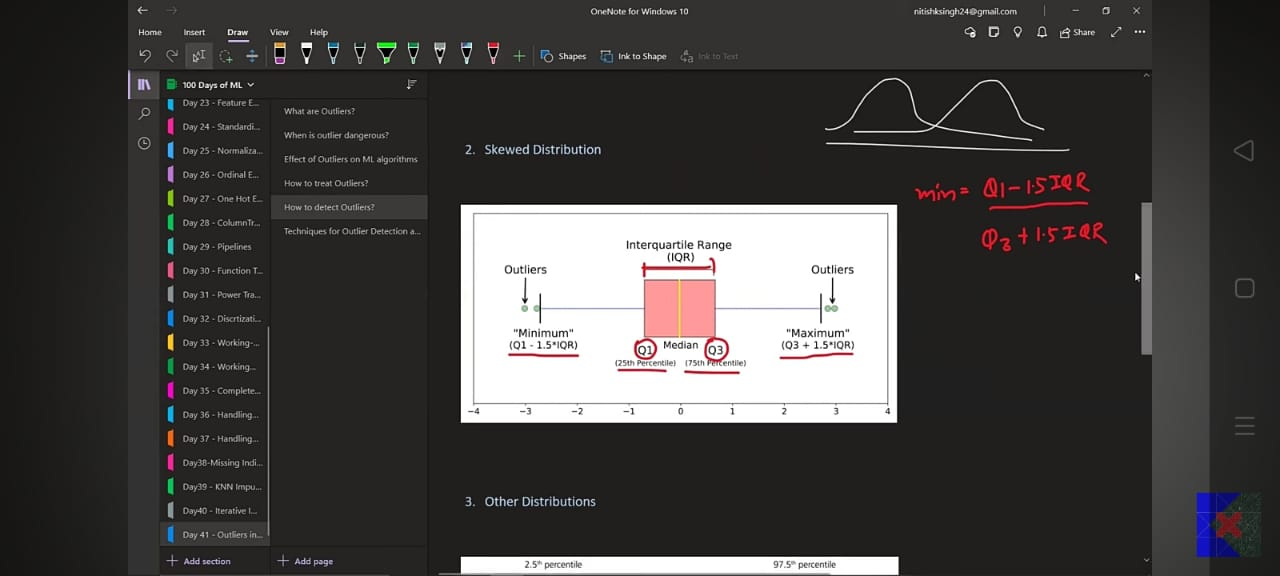

In [1]:
from PIL import Image
Image.open(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\iqr.jpeg")

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\placement_day42.csv")

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.shape

(1000, 3)